In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
stock_sentiment_df = pd.read_csv('/Users/urmitmahida34/Downloads/stock_sentiment.csv')
stock_sentiment_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [8]:
stock_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [9]:
stock_sentiment_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [10]:
stock_sentiment_df['Sentiment'].unique()

array([1, 0])

In [11]:
stock_sentiment_df['Sentiment'].value_counts()

Sentiment
1    3685
0    2106
Name: count, dtype: int64

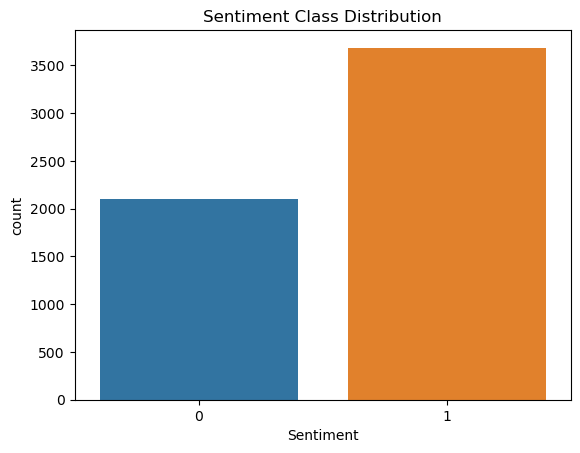

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=stock_sentiment_df, x='Sentiment')
plt.title('Sentiment Class Distribution')
plt.show()

### Data preprocessing

### Remove punctuations from text

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_func(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    
    return Test_punc_removed_join

In [20]:
stock_sentiment_df['Text-Without-Punctuations'] = stock_sentiment_df['Text'].apply(remove_func)
stock_sentiment_df

,Text,Sentiment,Text-Without-Punctuations
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


### Remove stopwords

In [21]:
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/urmitmahida34/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# After analyzing the data, it was observed that some frequently repeated words needed to be removed from the dataset
stop_words.extend(['from', 'subject', 'https', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

# Defining a preprocessing function to remove stopwords and short words (less than 3 characters long), as they don't add value to the data

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >=3 and token not in stop_words:
            result.append(token)
    return result

In [23]:
stock_sentiment_df['Text_Pre-processed'] = stock_sentiment_df['Text-Without-Punctuations'].apply(preprocess)
stock_sentiment_df

,Text,Sentiment,Text-Without-Punctuations,Text_Pre-processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [24]:
stock_sentiment_df['Text_Pre-processed']

0       [kickers, watchlist, xide, tit, soq, pnk, cpw,...
1       [movie, return, feageed, indicator, trades, aw...
2       [afraid, short, amzn, looking, like, nearmonop...
3                                                  [mnta]
4                                                      []
                              ...                        
5786    [industry, body, cii, said, discoms, likely, s...
5787    [gold, prices, slip, investors, book, profits,...
5788    [workers, bajaj, auto, agreed, wage, cut, peri...
5789    [sharemarket, live, sensex, high, points, nift...
5790    [sensex, nifty, climb, days, highs, still, key...
Name: Text_Pre-processed, Length: 5791, dtype: object

In [27]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]


stock_sentiment_df['Text_Lemmatized'] = stock_sentiment_df['Text_Pre-processed'].apply(lemmatize_words)
stock_sentiment_df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/urmitmahida34/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/urmitmahida34/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,Sentiment,Text-Without-Punctuations,Text_Pre-processed,Text_Lemmatized
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...","[kicker, watchlist, xide, tit, soq, pnk, cpw, ..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...","[movie, return, feageed, indicator, trade, awe..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...","[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],[mnta]
4,OI Over 21.37,1,OI Over 2137,[],[]
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...","[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...","[gold, price, slip, investor, book, profit, am..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...","[worker, bajaj, auto, agreed, wage, cut, perio..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...","[sharemarket, live, sensex, high, point, nifty..."


In [36]:
from gensim.models import Word2Vec

# Prepare the corpus for training
corpus = stock_sentiment_df['Text_Lemmatized'].tolist()

# Train a Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, workers=4)

# Display the vocabulary
model.wv.key_to_index


{'short': 0,
 'volume': 1,
 'like': 2,
 'market': 3,
 'long': 4,
 'stop': 5,
 'good': 6,
 'high': 7,
 'goog': 8,
 'new': 9,
 'bac': 10,
 'buy': 11,
 'watch': 12,
 'still': 13,
 'nice': 14,
 'look': 15,
 'back': 16,
 'move': 17,
 'next': 18,
 'higher': 19,
 'see': 20,
 'coronavirus': 21,
 'break': 22,
 'trade': 23,
 'price': 24,
 'time': 25,
 'close': 26,
 'ong': 27,
 'one': 28,
 'point': 29,
 'sensex': 30,
 'triangle': 31,
 'stock': 32,
 'nifty': 33,
 'weekly': 34,
 'call': 35,
 'could': 36,
 'breakout': 37,
 'looking': 38,
 'get': 39,
 'big': 40,
 'share': 41,
 'low': 42,
 'support': 43,
 'target': 44,
 'position': 45,
 'going': 46,
 'nfx': 47,
 'last': 48,
 'bullish': 49,
 'green': 50,
 'lower': 51,
 'httpstco': 52,
 'amzn': 53,
 'earnings': 54,
 'put': 55,
 'gap': 56,
 'line': 57,
 'bank': 58,
 'may': 59,
 'since': 60,
 'holding': 61,
 'profit': 62,
 'need': 63,
 'think': 64,
 'well': 65,
 'resistance': 66,
 'amid': 67,
 'open': 68,
 'strong': 69,
 'take': 70,
 'ddd': 71,
 'sell': 7

In [37]:
# Compute cosine similarity between two words
word1 = 'investor'
word2 = 'money'
similarity = model.wv.similarity(word1, word2)
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")

# Find most similar words to a given word
word = 'investor'
similar_words = model.wv.most_similar(word, topn=10)
print(f"Words most similar to '{word}':")
for similar_word, score in similar_words:
    print(f"{similar_word}: {score}")


Cosine similarity between 'investor' and 'money': 0.9630364775657654
Words most similar to 'investor':
nice: 0.9818484783172607
price: 0.9806740283966064
short: 0.9805406928062439
time: 0.9799370169639587
break: 0.9793752431869507
see: 0.9792325496673584
get: 0.9791528582572937
volume: 0.9789029955863953
httpstco: 0.9788174629211426
market: 0.9784864187240601


In [38]:
import numpy as np

# Function to create feature vectors by averaging word embeddings
def average_word_vectors(words, model, vector_size):
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

# Add a new column with the feature vectors
vector_size = 50
stock_sentiment_df['Feature_Vector'] = stock_sentiment_df['Text_Lemmatized'].apply(lambda x: average_word_vectors(x, model, vector_size))
stock_sentiment_df

,Text,Sentiment,Text-Without-Punctuations,Text_Pre-processed,Text_Lemmatized,Feature_Vector
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...","[kicker, watchlist, xide, tit, soq, pnk, cpw, ...","[0.016267085, -0.0121073, 0.014458482, 0.01050..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...","[movie, return, feageed, indicator, trade, awe...","[0.014930957, -0.01405906, 0.015648572, 0.0098..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...","[afraid, short, amzn, looking, like, nearmonop...","[0.02617778, -0.016501294, 0.0393651, 0.023878..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],[mnta],"[-0.016942983, -0.013974072, 0.018671485, 0.01..."
4,OI Over 21.37,1,OI Over 2137,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...","[industry, body, cii, said, discoms, likely, s...","[0.004089572, -0.014237759, 0.010085443, 0.003..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...","[gold, price, slip, investor, book, profit, am...","[0.020250034, -0.01833753, 0.028629625, 0.0060..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...","[worker, bajaj, auto, agreed, wage, cut, perio...","[0.003353115, -0.011239699, 0.00875906, 0.0085..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...","[sharemarket, live, sensex, high, point, nifty...","[0.014781849, -0.027494723, 0.030769456, 0.007..."


In [42]:
X = np.vstack(stock_sentiment_df['Feature_Vector'].values)
X

array([[ 0.01626709, -0.0121073 ,  0.01445848, ..., -0.01833127,
         0.02424358,  0.01372197],
       [ 0.01493096, -0.01405906,  0.01564857, ..., -0.02342577,
         0.04483329,  0.01828829],
       [ 0.02617778, -0.01650129,  0.0393651 , ..., -0.04967872,
         0.09207654,  0.04478206],
       ...,
       [ 0.00335311, -0.0112397 ,  0.00875906, ..., -0.01268732,
         0.02230602,  0.01368435],
       [ 0.01478185, -0.02749472,  0.03076946, ..., -0.03932225,
         0.06818088,  0.0382366 ],
       [ 0.01959016, -0.02571867,  0.02593681, ..., -0.0455031 ,
         0.06060027,  0.03739589]])

In [43]:
X.shape

(5791, 50)

In [55]:
y = stock_sentiment_df['Sentiment'].values


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = LogisticRegression()
# Train the classifier
classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.631578947368421
Precision: 0.631578947368421
Recall: 1.0
F1-Score: 0.7741935483870968


### Plotting wordcloud

In [59]:
# joining the preprocessed text into a string
stock_sentiment_df['Text_Lemmatized-joined'] = stock_sentiment_df['Text_Lemmatized'].apply(lambda x: " ".join(x))
stock_sentiment_df

,Text,Sentiment,Text-Without-Punctuations,Text_Pre-processed,Text_Lemmatized,Feature_Vector,Text_Lemmatized-joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...","[kicker, watchlist, xide, tit, soq, pnk, cpw, ...","[0.016267085, -0.0121073, 0.014458482, 0.01050...",kicker watchlist xide tit soq pnk cpw bpz trad...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...","[movie, return, feageed, indicator, trade, awe...","[0.014930957, -0.01405906, 0.015648572, 0.0098...",movie return feageed indicator trade awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...","[afraid, short, amzn, looking, like, nearmonop...","[0.02617778, -0.016501294, 0.0393651, 0.023878...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],[mnta],"[-0.016942983, -0.013974072, 0.018671485, 0.01...",mnta
4,OI Over 21.37,1,OI Over 2137,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",
...,...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...","[industry, body, cii, said, discoms, likely, s...","[0.004089572, -0.014237759, 0.010085443, 0.003...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...","[gold, price, slip, investor, book, profit, am...","[0.020250034, -0.01833753, 0.028629625, 0.0060...",gold price slip investor book profit amid coro...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...","[worker, bajaj, auto, agreed, wage, cut, perio...","[0.003353115, -0.011239699, 0.00875906, 0.0085...",worker bajaj auto agreed wage cut period april...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...","[sharemarket, live, sensex, high, point, nifty...","[0.014781849, -0.027494723, 0.030769456, 0.007...",sharemarket live sensex high point nifty test ...


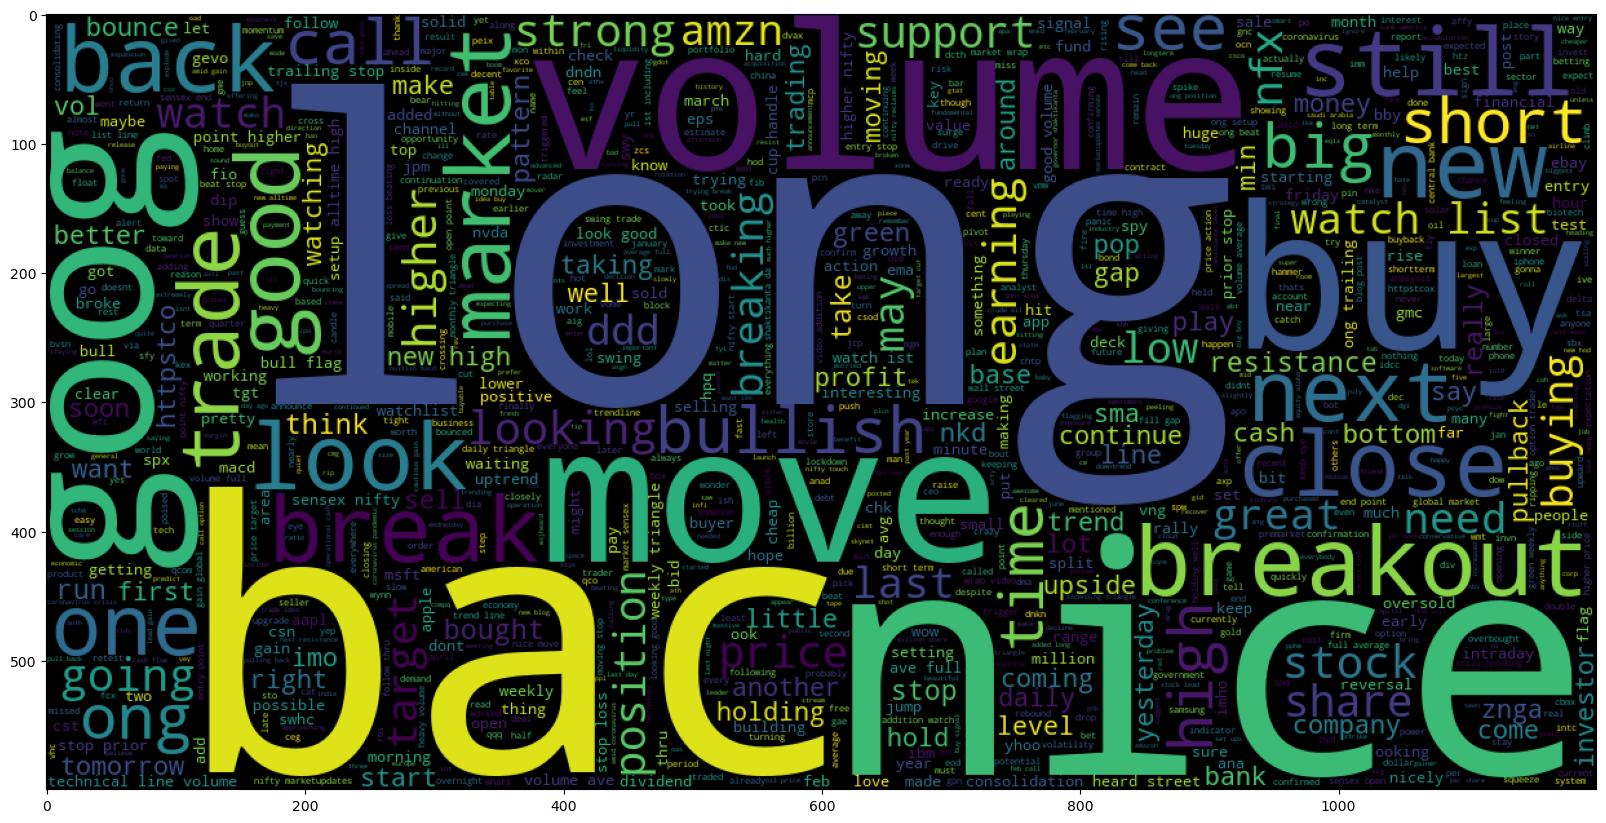

In [60]:
# Plot WORDCLOUD for sentiment class '1':
plt.figure(figsize=(20,20))
wc_1 = WordCloud(max_words = 1000, width = 1200, height = 600)\
                        .generate(" ".join(stock_sentiment_df[stock_sentiment_df['Sentiment']==1]['Text_Lemmatized-joined']))
plt.imshow(wc_1)

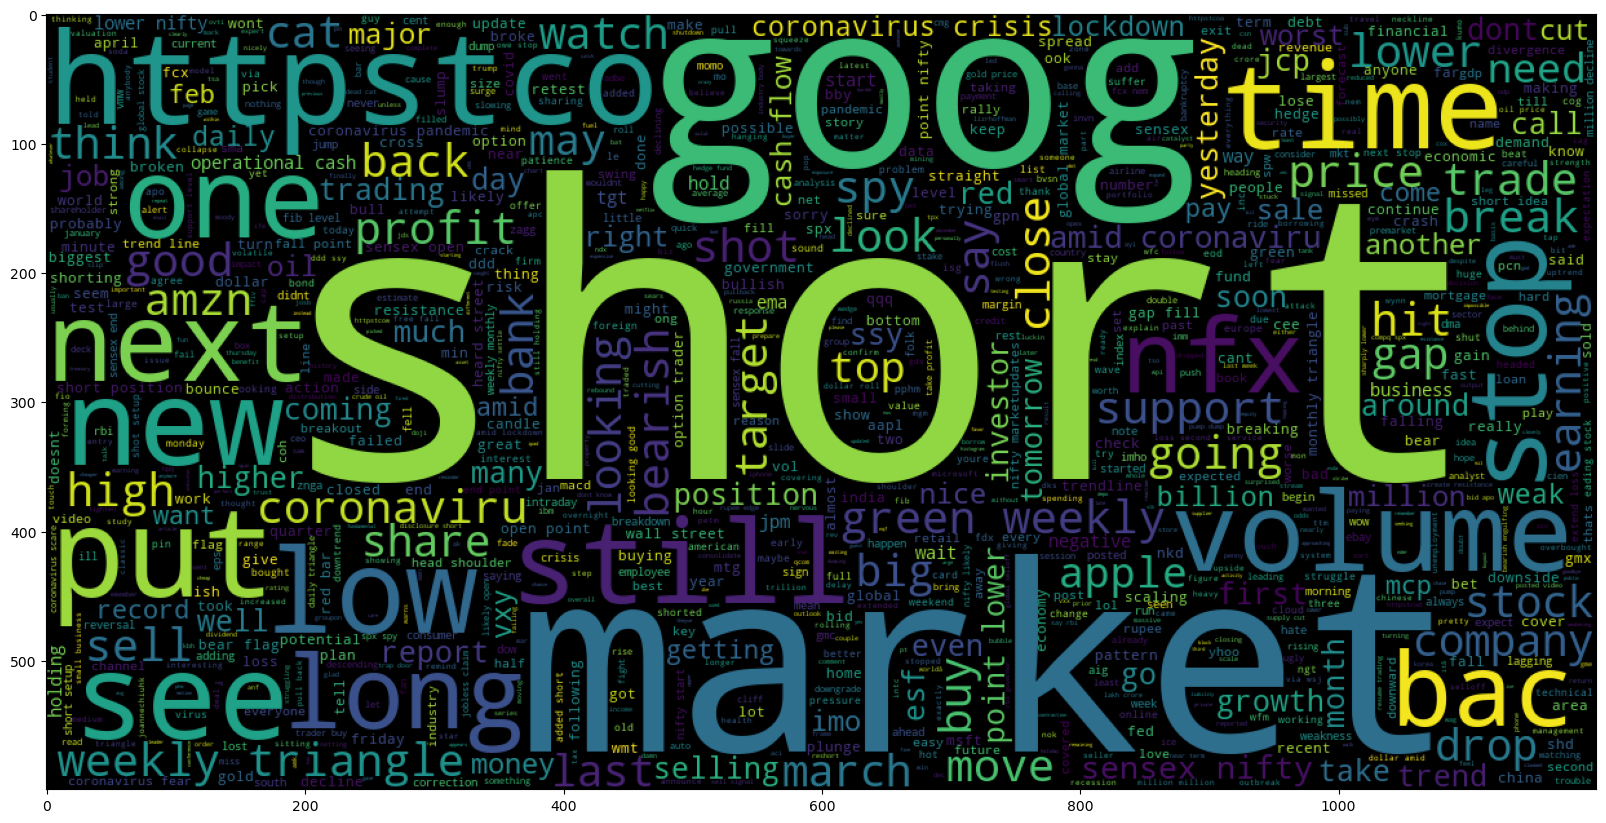

In [62]:
# Plot WORDCLOUD for sentiment class '0':
plt.figure(figsize=(20,20))
wc_0 = WordCloud(max_words = 1000, width = 1200, height = 600)\
                                      .generate(" ".join(stock_sentiment_df[stock_sentiment_df['Sentiment']==0]['Text_Lemmatized-joined']))
plt.imshow(wc_0)

### Visualization of dataset

In [64]:
# tokenize text into words
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_sentiment_df['Text_Lemmatized-joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

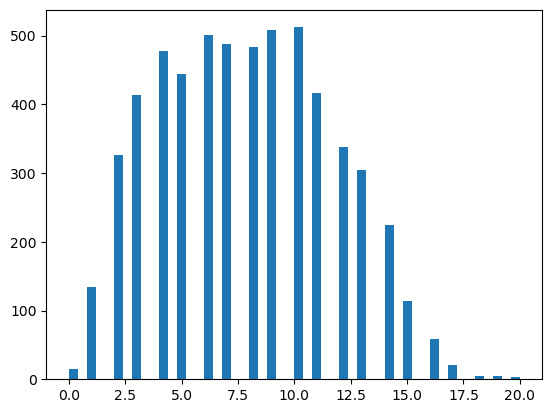

In [65]:
# create histogram to visualize tokenized data
plt.figure()
plt.hist(tweets_length, bins =50)
plt.show()

### Here, we analyze the distribution of tweet lengths and observe that the majority of tweets consist of 5 to 10 words. The histogram depicting this distribution resembles a bell curve, indicating a typical pattern in tweet length distribution.


### Prepare data by tokenization & padding

In [94]:
# tokenize words by converting text into sequence of integers

In [66]:
# total number of words in dataset
list_of_words = []

for i in stock_sentiment_df['Text_Lemmatized']:
    for j in i:
        list_of_words.append(j)
        
total_words  = len(set(list_of_words))
total_words

8634

In [68]:
X = stock_sentiment_df['Text_Lemmatized']
y = stock_sentiment_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [70]:
X_train.shape

(4632,)

In [71]:
X_test.shape

(1159,)

In [72]:
X_train

5509    [sensex, open, point, lower, nifty, start, tra...
3262    [bac, marketmaket, make, lot, short, seller, t...
1316    [vng, sleeping, long, predict, wake, big, volu...
3799                        [jds, watch, possible, short]
4607          [dndn, turning, green, bull, hammer, close]
                              ...                        
5701    [rbi, buy, government, bond, open, market, boo...
5754    [market, crash, dow, plunge, point, early, trade]
5633    [sensex, open, point, higher, nifty, start, am...
456                           [ssys, eached, crash, near]
3537    [wow, last, time, doug, ka, umour, einhorn, um...
Name: Text_Lemmatized, Length: 4632, dtype: object

In [73]:
# creating tokenizer to tokenize the words & create sequence of tokenized words
tokenizer = Tokenizer(num_words = total_words)

tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [74]:
train_sequences

[[27, 64, 26, 50, 34, 92, 974, 411, 95, 4, 65, 3149, 3150],
 [8, 3151, 84, 160, 1, 412, 366, 98, 93],
 [323, 3152, 5, 1639, 975, 41, 2, 389, 582, 17, 79, 143],
 [1127, 10, 174, 1],
 [496, 687, 47, 109, 637, 24],
 [271, 1640, 324, 413, 15, 115],
 [65, 3153, 1128, 344, 534, 3154, 2157, 438, 3155, 3156, 3157],
 [1333, 15, 7, 1, 189, 367],
 [1641, 3158, 85, 200, 19, 43, 49, 583, 14],
 [237, 2158, 3159, 497, 584, 2159, 2160, 9, 852, 3160],
 [190, 3161, 9, 1129, 1130],
 [1131, 688, 59, 128, 16],
 [303, 7, 3162, 133, 1642, 164, 191, 51, 1643],
 [1334, 3163, 42, 2161, 226, 689, 3164, 3165, 3166, 164, 238],
 [756, 111, 20, 325, 100, 24, 690, 3167],
 [1644, 20, 6],
 [1132, 3168, 201, 249, 1645, 1335, 1646],
 [84, 345, 1133, 414, 498, 535, 3169, 2162, 41, 2163, 1336, 3170, 29, 2164],
 [3171, 691, 3172, 103, 144],
 [1337, 86, 367, 1647, 17, 42],
 [1, 21],
 [227, 976, 2165, 85, 109, 19, 43, 583, 14, 390, 49, 2166],
 [1648, 18, 3, 228, 192],
 [86, 2, 389, 138, 638, 1338],
 [415, 585, 87, 129, 42, 98

In [75]:
# In this step, we perform padding on the training and testing data.
#The objective is to ensure that all sequences in our data have the same length. 
# By doing so, we make the input data uniform in size, which enhances the efficiency of the deep learning model. 
# Padding involves adding zeros at the beginning of sequences to make them equal in length.
padded_train = pad_sequences(train_sequences, maxlen=15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen=15, padding = 'post', truncating = 'post')

In [76]:
padded_train

array([[  27,   64,   26, ..., 3150,    0,    0],
       [   8, 3151,   84, ...,    0,    0,    0],
       [ 323, 3152,    5, ...,    0,    0,    0],
       ...,
       [  27,   64,   26, ...,  274,    0,    0],
       [ 188, 7602,  624, ...,    0,    0,    0],
       [ 336,   51,   29, ...,    0,    0,    0]], dtype=int32)

In [77]:
padded_train.shape

(4632, 15)

In [78]:
padded_test.shape

(1159, 15)

In [79]:
y_train

5509    0
3262    1
1316    1
3799    0
4607    1
       ..
5701    1
5754    0
5633    1
456     0
3537    1
Name: Sentiment, Length: 4632, dtype: int64

In [80]:
# converting y_train & y_test to 2D representations
# By converting y_train and y_test to categorical 2D representation, we ensure that the output layer of our neural network has two neurons. 
# corresponding to the two classes in our dataset (0 and 1). When neuron 1 fires, it indicates class 0, and neuron 2 firing indicates class 1. 
# This representation allows us to effectively model the binary classification task.
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

y_train_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [81]:
y_test_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [87]:
X = np.vstack(stock_sentiment_df['Feature_Vector'].values)
y = stock_sentiment_df['Sentiment']

In [90]:
X.shape

(5791, 50)

In [91]:
y.shape

(5791,)

In [82]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(padded_train, y_train, test_size=0.2, random_state=42)

# Instantiate TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit TPOTClassifier on training data
tpot.fit(padded_train, y_train)

# Evaluate TPOTClassifier on testing data
y_pred = tpot.predict(padded_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Export the optimized pipeline as Python code
tpot.export('tpot_pipeline.py')

/opt/anaconda3/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6761668775235845

Generation 2 - Current best internal CV score: 0.6761668775235845

Generation 3 - Current best internal CV score: 0.6763816952896196

Generation 4 - Current best internal CV score: 0.6765969790377935

Generation 5 - Current best internal CV score: 0.6765969790377935

Best pipeline: RandomForestClassifier(GaussianNB(input_matrix), bootstrap=False, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
Accuracy: 0.6445211389128559


In [92]:
X = np.vstack(stock_sentiment_df['Feature_Vector'].values)
y = stock_sentiment_df['Sentiment']

In [93]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit TPOTClassifier on training data
tpot.fit(X_train, y_train)

# Evaluate TPOTClassifier on testing data
y_pred = tpot.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Export the optimized pipeline as Python code
tpot.export('tpot_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6696904247660187

Generation 2 - Current best internal CV score: 0.6696904247660187

Generation 3 - Current best internal CV score: 0.6696904247660187

Generation 4 - Current best internal CV score: 0.6705550546247562

Generation 5 - Current best internal CV score: 0.6724961032243635

Best pipeline: ExtraTreesClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=4, min_samples_split=2, n_estimators=100), bootstrap=False, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
Accuracy: 0.6721311475409836


In [94]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.35000000000000003, min_samples_leaf=4, min_samples_split=2, n_estimators=100)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.8500000000000001, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
)
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)
    
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, results)
print("Accuracy:", accuracy)

Accuracy: 0.6712683347713546


In [85]:
## Below is the tpot_pipeline.py generated code 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from sklearn.naive_bayes import GaussianNB


# Average CV score on the training set was: 0.6748712141863602
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
)# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(padded_train, y_train)
results = exported_pipeline.predict(padded_test)
accuracy = accuracy_score(y_test, results)
print("Accuracy:", accuracy)

Accuracy: 0.6479723899913719


### The TPOTClassifier automatically searches for the best pipeline (including model and hyperparameters). 
### It found a pipeline with certain hyperparameters that achieved an accuracy of 65.92%.
### The manually trained RandomForestClassifier used specific hyperparameters and achieved an accuracy of 65.57%.


### NN to perofrm setiment analysis

In [95]:
total_words

8634

In [96]:
X_train.shape

(4632, 50)

In [121]:
model = Sequential()

model.add(Embedding(total_words, output_dim = 512))  

model.add(LSTM(256))

model.add(Dense(128, activation = 'relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(2, activation = 'softmax')) 

model.build(input_shape=(4632, 15))
model.compile(optimizer =  'adam', loss = 'binary_crossentropy', metrics = ['acc']) 
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (4632, 15, 512)        │     4,420,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (4632, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (4632, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (4632, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (4632, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,241,218 (19.99 MB)

 Trainable params: 5,241,218 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
y_train_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [115]:
y_train_binary = y_train_cat[:, 1]  
y_train_binary

array([0., 1., 1., ..., 1., 0., 1.])

In [122]:
model.fit(padded_train, y_train_cat, batch_size =32, validation_split=0.2, epochs = 10)


Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - acc: 0.6508 - loss: 0.6221 - val_acc: 0.7562 - val_loss: 0.4896
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - acc: 0.8802 - loss: 0.3189 - val_acc: 0.7681 - val_loss: 0.5532
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - acc: 0.9280 - loss: 0.1889 - val_acc: 0.7681 - val_loss: 0.6278
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - acc: 0.9692 - loss: 0.0925 - val_acc: 0.7648 - val_loss: 0.6786
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - acc: 0.9769 - loss: 0.0795 - val_acc: 0.7767 - val_loss: 0.8176
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - acc: 0.9799 - loss: 0.0591 - val_acc: 0.7659 - val_loss: 0.7613
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - acc: 0.9782 - loss: 0.0651 - val_acc: 0.7724 - val_loss: 1.1310
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - acc: 0.9791 - loss: 0.0480 - val_acc: 0.7810 - val_loss: 0.9875
Epoch 9/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/

### Training model evaluation

In [123]:
pred = model.predict(padded_test)

predicted_y  = []
for i in pred:
    predicted_y.append(np.argmax(i))
    
predicted_y

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


[1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,


In [124]:
original_y = []
for i in y_test_cat:
    original_y.append(np.argmax(i))
    
original_y

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


In [125]:
# Test model on unseen data
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

accuracy = accuracy_score(original_y, predicted_y)
accuracy

0.730802415875755

In [126]:
f1 = f1_score(original_y, predicted_y)
precision = precision_score(original_y, predicted_y)
recall = recall_score(original_y, predicted_y)
auc = roc_auc_score(original_y, predicted_y)

print("f1 for the model is: {}".format(f1))
print("Precision for the model is: {}".format(precision))
print("Recall for the model is: {}".format(recall))
print("AUC for the model is: {}".format(auc))

f1 for the model is: 0.7889039242219216
Precision for the model is: 0.7620915032679738
Recall for the model is: 0.8176718092566619
AUC for the model is: 0.704800030188869
